In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensor import Tensor
from module import Module
from layers.Linear import Linear
from losses import BinaryCrossEntropyWithLogits

In [3]:
# [1, 1] quarter
d1 = np.random.rand(50, 2)
# [-1, -1] quarter
d2 = (np.random.rand(50, 2) - 1)
# Labels
l1 = np.ones(len(d1) + len(d2))
l1 = np.column_stack((l1, np.zeros(len(d1) + len(d2))))

# [-1, 1] quarter
d3 = np.random.rand(50, 2)
d3[:,0] -= np.ones(50)
# [1, -1] quarter
d4 = np.random.rand(50, 2)
d4[:,1] -= np.ones(50)
# Labels
l2 = np.zeros(len(d3) + len(d4))
l2 = np.column_stack((l2, np.ones(len(d1) + len(d2))))


# All the data
data = Tensor(np.concatenate((d1, d2, d3, d4)))
labels = np.concatenate((l1, l2)).astype(int)
# labels = np.argmax(labels, axis=1)
labels = Tensor(labels[:,0])
# And all labels :
# [1, 0] one hot encoded: 0 -> blue
# [0, 1] one hot encoded: 1 -> red

print(f"data shape: {data.shape}")
print(f"labels shape: {labels.shape}")

data shape: (200, 2)
labels shape: (200,)


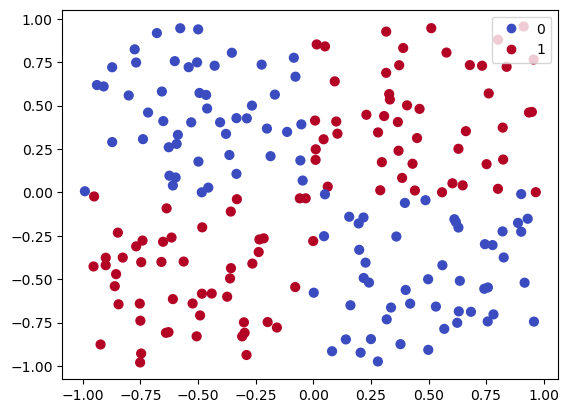

In [4]:
scatter = plt.scatter(data.data[:,0], data.data[:,1], s=40, c=labels.data, cmap='coolwarm')
plt.legend(*scatter.legend_elements(), loc=1, frameon=True)

In [5]:
class XOR(Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()               
        self.layer1 = Linear(input_dim, hidden_dim)
        self.layer2 = Linear(hidden_dim, hidden_dim)
        self.layer3 = Linear(hidden_dim, output_dim)
        
    def forward(self, inputs):
        # Forward pass
        
        out1 = self.layer1(inputs).tanh()
        out2 = self.layer2(out1).tanh()
        return self.layer3(out2)
    
model1 = XOR(2, 10, 1)

epoch: 0 | loss: 6.764E-01
epoch: 1 | loss: 6.768E-01
epoch: 2 | loss: 6.458E-01
epoch: 3 | loss: 6.365E-01
epoch: 4 | loss: 6.148E-01
epoch: 5 | loss: 5.949E-01
epoch: 6 | loss: 5.809E-01
epoch: 7 | loss: 5.528E-01
epoch: 8 | loss: 5.290E-01
epoch: 9 | loss: 5.043E-01
epoch: 10 | loss: 4.709E-01
epoch: 11 | loss: 4.467E-01
epoch: 12 | loss: 4.171E-01
epoch: 13 | loss: 3.949E-01
epoch: 14 | loss: 3.781E-01
epoch: 15 | loss: 3.609E-01
epoch: 16 | loss: 3.455E-01
epoch: 17 | loss: 3.238E-01
epoch: 18 | loss: 2.948E-01
epoch: 19 | loss: 2.642E-01
epoch: 20 | loss: 2.323E-01
epoch: 21 | loss: 2.014E-01
epoch: 22 | loss: 1.721E-01
epoch: 23 | loss: 1.440E-01
epoch: 24 | loss: 1.250E-01
epoch: 25 | loss: 1.189E-01
epoch: 26 | loss: 1.160E-01
epoch: 27 | loss: 1.118E-01
epoch: 28 | loss: 1.046E-01
epoch: 29 | loss: 9.631E-02
epoch: 30 | loss: 8.892E-02
epoch: 31 | loss: 8.090E-02
epoch: 32 | loss: 7.455E-02
epoch: 33 | loss: 6.853E-02
epoch: 34 | loss: 6.250E-02
epoch: 35 | loss: 5.859E-02
ep

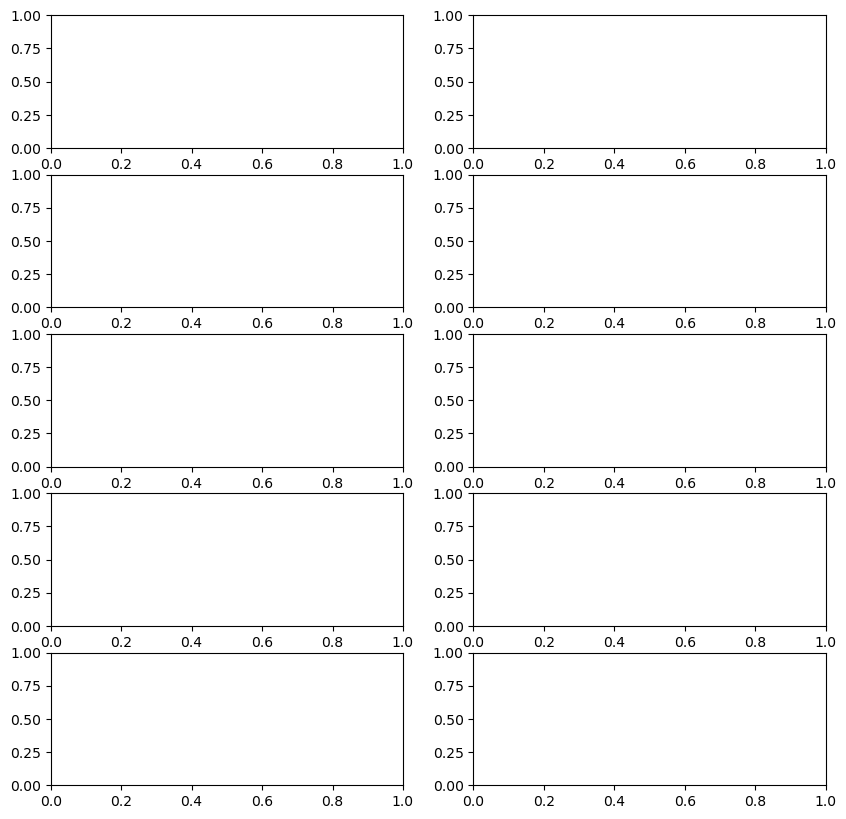

In [30]:
from Optimizer.Adam import Adam
optimizer = Adam(model1.parameters(), learning_rate=0.1)
criterion = BinaryCrossEntropyWithLogits()

EPOCHS = 100
fig, axs = plt.subplots(5,2,figsize=(10,10))
axs=axs.flatten()

history = []
for epoch in range(EPOCHS):
    # Gradients accumulates, therefore we need to set them to zero at each iteration
    optimizer.zero_grad()
    # Predictions
    predictions = model1(data)
    loss = criterion(predictions, labels)
    # Compute the gradient
    loss.backward()
    # Update the parameters
    optimizer.step()
    # Record the loss for plotting
    history.append(loss.data)
    print(f"epoch: {epoch} | loss: {loss.data:1.3E}")
    #axs[epoch].hist(model1.layer1.weight.grad.flatten())

In [7]:
optimizer.zero_grad()

In [8]:
model1.layer1.weight

Tensor(data = [[ 0.0497617  -0.14193023  0.08172239 -0.15714041 -0.1959074   0.02432758
  -0.06674046  0.19884562  0.31014243 -0.13397356]
 [-0.02632299 -0.29697202 -0.12378852 -0.03002223 -0.04130561 -0.03237595
   0.12348182 -0.1636107   0.20244544  0.04901743]], grad = 0)

In [9]:
predictions.grad.shape

(200, 1)

Epoch [0/10], Loss: 0.6921
tensor([[ 3.3181e-04, -1.9647e-03],
        [ 5.0251e-03, -5.6761e-03],
        [ 6.4496e-05,  7.4455e-04],
        [-2.8653e-06,  7.9105e-04],
        [-9.2612e-05,  8.9140e-04],
        [-1.7840e-04,  1.1840e-03],
        [ 1.3764e-04, -6.9559e-05],
        [-7.3714e-04,  1.9249e-03],
        [-5.9560e-05, -8.6990e-03],
        [-6.5200e-04,  1.9531e-03]])
Epoch [1/10], Loss: 0.7694
tensor([[ 0.0031, -0.0132],
        [-0.0015,  0.0069],
        [-0.0016, -0.0226],
        [ 0.0004,  0.0156],
        [-0.0007,  0.0153],
        [-0.0033, -0.0222],
        [ 0.0054,  0.0161],
        [-0.0092, -0.0182],
        [-0.0088,  0.0342],
        [-0.0003,  0.0098]])
Epoch [2/10], Loss: 0.7399
tensor([[-0.0085,  0.0179],
        [ 0.0129,  0.0003],
        [-0.0007,  0.0067],
        [ 0.0149, -0.0034],
        [ 0.0144, -0.0094],
        [-0.0032,  0.0024],
        [ 0.0023,  0.0021],
        [-0.0040,  0.0054],
        [-0.0119, -0.0605],
        [ 0.0080, -0.0165

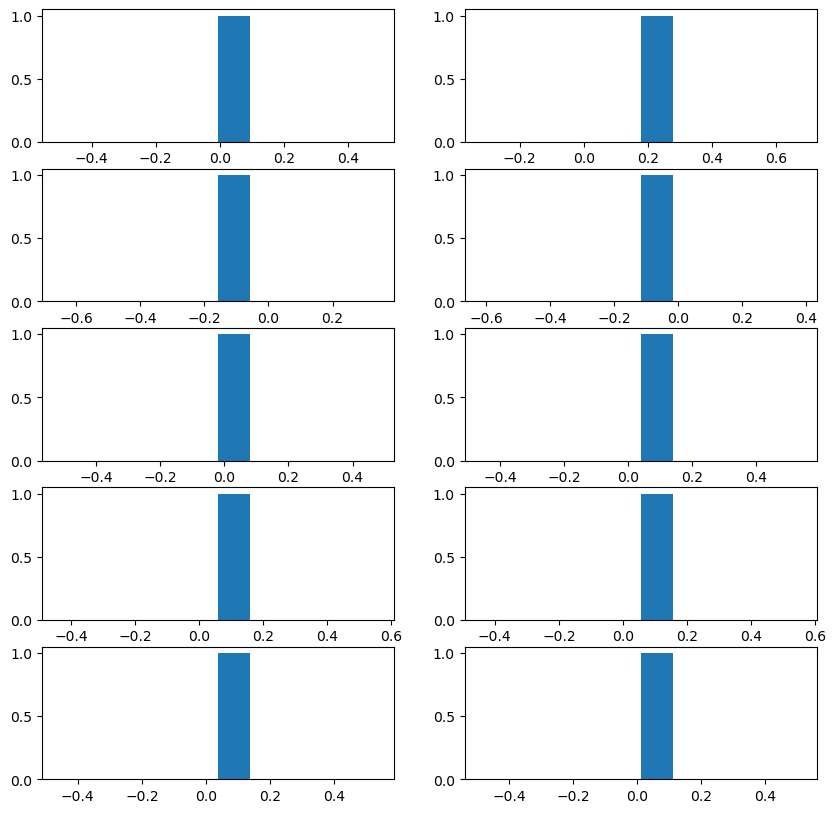

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

fig, axs = plt.subplots(5,2, figsize=(10,10))
axs = axs.flatten()
# Define the model class (as provided earlier)
class Model(nn.Module):
    """
    Create your own model.
    The attributes should be the submodel used during the forward pass.
    You don't have to necessarily affect the activation function, unless you want to set a manual backward pass.
    """
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Model, self).__init__()  # Call the parent class's __init__ method
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, inputs):
        out1 = self.layer1(inputs).tanh()
        out2 = self.layer2(out1).tanh()
        return self.layer3(out2)

# Create an instance of the model
model = Model(2, 10, 1)

with torch.no_grad():
    model.layer1.weight.copy_(torch.tensor(model1.layer1.weight.data, dtype=torch.float32).transpose(1,0))
    model.layer1.bias.copy_(torch.tensor(model1.layer1.bias.data, dtype=torch.float32))
    model.layer2.weight.copy_(torch.tensor(model1.layer2.weight.data, dtype=torch.float32).transpose(1,0))
    model.layer2.bias.copy_(torch.tensor(model1.layer2.bias.data, dtype=torch.float32))
    model.layer3.weight.copy_(torch.tensor(model1.layer3.weight.data, dtype=torch.float32).transpose(1,0))
    model.layer3.bias.copy_(torch.tensor(model1.layer3.bias.data, dtype=torch.float32))

# Define a loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Stochastic Gradient Descent with learning rate 0.01

# Dummy data
# Features (input_dim = 2), Targets (output_dim = 1)
inputs = torch.tensor(data.data, dtype=torch.float32)
targets = torch.tensor(labels.data, dtype=torch.float32)

# Training loop
num_epochs = 10  # Number of epochs

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs.flatten(), targets)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the parameter gradients
    loss.backward()       # Backward pass to compute gradients
    optimizer.step()      # Update model parameters
    
    # Print loss for every 10 epochs
    print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
    for name, param in model.named_parameters():
        if name == 'layer1.weight':
            print(param.grad)

    axs[epoch].hist(param.grad.numpy().flatten(), label='grad')
    #axs[epoch].hist(model.layer1.weight.detach().numpy().flatten(), label='grad')

print("Training complete!")


(array([ 8., 15., 30., 31., 36., 22., 12., 11., 22., 13.]),
 array([0.46685243, 0.47606054, 0.48526862, 0.49447674, 0.50368482,
        0.51289296, 0.52210104, 0.53130913, 0.54051721, 0.54972535,
        0.55893344]),
 <BarContainer object of 10 artists>)

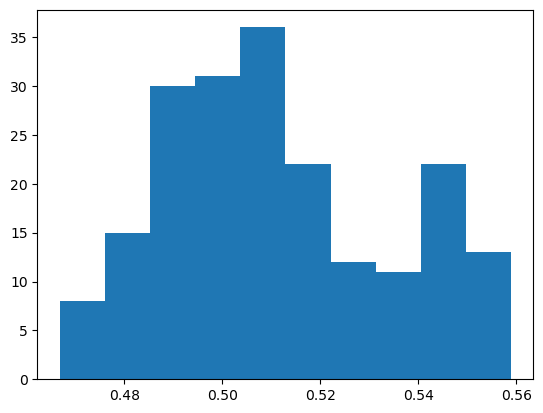

In [11]:
plt.hist(outputs.sigmoid().detach().flatten().numpy())

(array([2., 2., 3., 2., 3., 3., 1., 0., 1., 3.]),
 array([-0.82525218, -0.64814121, -0.47103021, -0.29391921, -0.11680822,
         0.06030276,  0.23741375,  0.41452473,  0.5916357 ,  0.76874673,
         0.9458577 ]),
 <BarContainer object of 10 artists>)

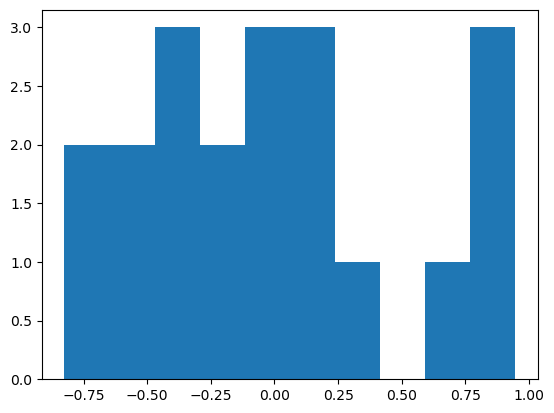

In [12]:
plt.hist(model.layer1.weight.detach().flatten().numpy())

In [13]:
for name, param in model.named_parameters():
        if param.grad is not None:
            print(f"Epoch {epoch}, Gradient for {name}: \n{param.grad}\n")

Epoch 9, Gradient for layer1.weight: 
tensor([[-8.8080e-04, -4.5948e-04],
        [ 1.1041e-05,  1.4916e-03],
        [-5.3576e-04,  9.4891e-05],
        [-3.1236e-04,  1.4171e-03],
        [ 1.3508e-04,  1.5450e-04],
        [ 3.4489e-04, -2.3300e-03],
        [-4.1073e-04,  1.1538e-04],
        [ 1.9886e-04, -7.0654e-04],
        [-5.2972e-03, -9.1853e-03],
        [ 1.0020e-03,  1.0503e-04]])

Epoch 9, Gradient for layer1.bias: 
tensor([ 0.0020, -0.0077,  0.0008, -0.0088, -0.0012,  0.0054,  0.0009,  0.0013,
        -0.0460, -0.0019])

Epoch 9, Gradient for layer2.weight: 
tensor([[-8.0068e-04, -9.3692e-04, -2.1623e-04, -1.0558e-03,  3.7001e-04,
          2.5983e-04, -6.3745e-04, -1.9635e-03, -9.8531e-03,  1.3737e-03],
        [-5.1912e-04, -5.1902e-04, -1.2897e-04, -5.7988e-04,  3.0565e-04,
          1.2824e-04, -3.6977e-04, -1.2584e-03, -6.5702e-03,  8.7186e-04],
        [ 5.0537e-04,  3.2440e-03, -8.6269e-04,  3.1388e-03,  8.3329e-04,
         -2.5371e-03,  2.8067e-03,  5.5697e-04

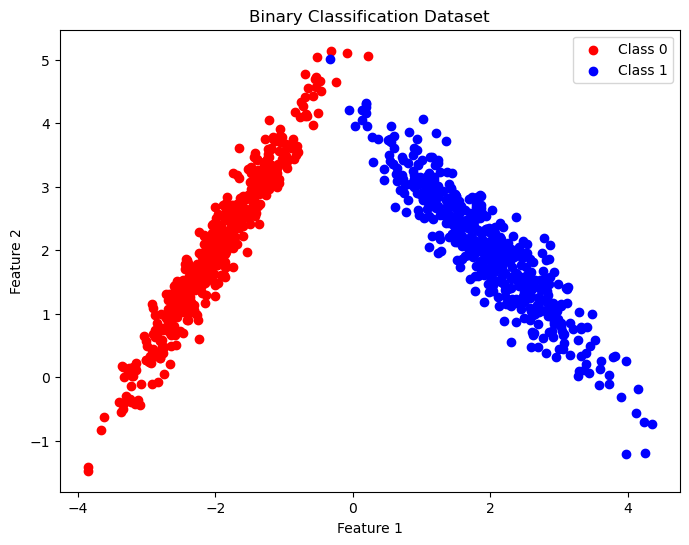

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a simple binary classification dataset
X, y = make_classification(n_samples=1000,  # Number of samples
                           n_features=2,    # Number of features (2 for easy visualization)
                           n_informative=2, # Number of informative features
                           n_redundant=0,   # Number of redundant features
                           n_clusters_per_class=1, # Number of clusters per class
                           flip_y=0,        # No label noise
                           class_sep=2.0,   # Separation between classes
                           random_state=42) # For reproducibility

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


epoch: 0 | loss: 8.110E-01
epoch: 1 | loss: 6.626E-01
epoch: 2 | loss: 5.569E-01
epoch: 3 | loss: 4.754E-01
epoch: 4 | loss: 4.094E-01
epoch: 5 | loss: 3.549E-01
epoch: 6 | loss: 3.096E-01
epoch: 7 | loss: 2.720E-01
epoch: 8 | loss: 2.406E-01
epoch: 9 | loss: 2.145E-01


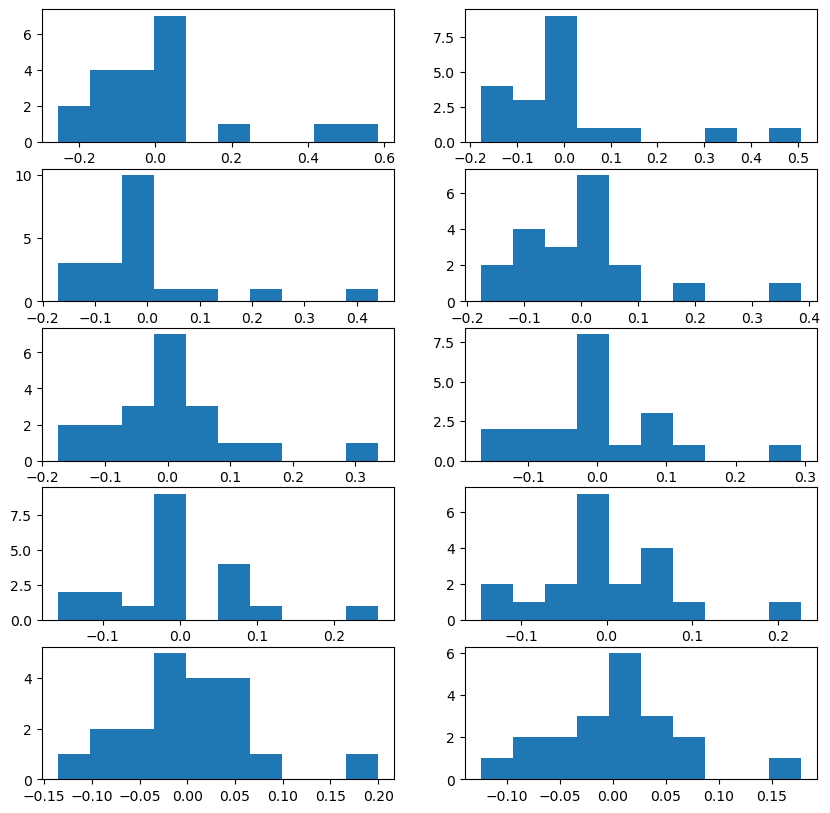

In [15]:
data2, labels2 = Tensor(X), Tensor(y)
from Optimizer.Adam import Adam
from Optimizer.SGD import SGD
optimizer = SGD(model1.parameters(), learning_rate=0.1)
criterion = BinaryCrossEntropyWithLogits()

EPOCHS = 10
fig, axs = plt.subplots(5,2,figsize=(10,10))
axs=axs.flatten()

history = []
for epoch in range(EPOCHS):
    # Gradients accumulates, therefore we need to set them to zero at each iteration
    optimizer.zero_grad()
    # Predictions
    predictions = model1(data2)
    loss = criterion(predictions, labels2)
    # Compute the gradient
    loss.backward()
    # Update the parameters
    optimizer.step()
    # Record the loss for plotting
    history.append(loss.data)
    print(f"epoch: {epoch} | loss: {loss.data:1.3E}")
    axs[epoch].hist(model1.layer1.weight.grad.flatten())

In [16]:
import torch
import torch.nn as nn
lin1 = Linear(2,1)
o1 = lin1(data2)
#print(o1)
bce = BinaryCrossEntropyWithLogits()
loss1 = bce(o1[:5], labels2[:5])
#loss1.backward()
####

lin2 = torch.nn.Linear(2,1, bias=False)
lin2.weight = torch.nn.Parameter(torch.tensor(lin1.weight.data, dtype=torch.float32).transpose(1,0))
c = nn.BCEWithLogitsLoss()
o2 = lin2(torch.tensor(X, dtype=torch.float32))
o2.retain_grad()
loss2 = c(o2[:5].flatten(), torch.tensor(y[:5], dtype=torch.float32))
#loss2.backward()

In [17]:
o1[:5].sigmoid()

Tensor(data = [[0.88935491]
 [0.92585448]
 [0.12505   ]
 [0.52517462]
 [0.94372891]], grad = 0)

In [18]:
o1[:5], o2[:5], y[:5]

(Tensor(data = [[ 2.08416864]
  [ 2.52468743]
  [-1.9454531 ]
  [ 0.10078369]
  [ 2.81965798]], grad = 0),
 tensor([[ 2.0842],
         [ 2.5247],
         [-1.9455],
         [ 0.1008],
         [ 2.8197]], grad_fn=<SliceBackward0>),
 array([1, 1, 0, 0, 1]))

In [19]:
y.shape, o1.shape

((1000,), (1000, 1))

In [20]:
print(f'{len(data2.shape)=}, {len(labels2.shape)=}')

len(data2.shape)=2, len(labels2.shape)=1


In [21]:
loss1,loss2

(Tensor(data = 0.2261220268563445, grad = 0),
 tensor(0.2261, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>))

In [22]:
np.mean(np.log([[0.9673497 ],
 [0.96993771],
 [1-0.46119592],
 [1-0.89459141],
 [0.87273878]]))

-0.613630407851137

In [23]:
for epoch in range(100):
    o1=lin1(data2)
    loss1 = bce(o1, labels2)
    loss1.backward()
    o2 = lin2(torch.tensor(X, dtype=torch.float32))
    o2.retain_grad()
    loss2 = c(o2.flatten(), torch.tensor(y, dtype=torch.float32))
    loss2.backward()
    
    lin1.weight = Tensor(lin1.weight.data - 0.1*lin1.weight.grad)
    lin2.weight = torch.nn.Parameter(lin2.weight - 0.1*lin2.weight.grad)

    print(f'{loss1=}, {loss2=}')


loss1=Tensor(data = 0.34620632789357014, grad = [1]), loss2=tensor(0.3462, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tensor(data = 0.3116056794287481, grad = [1]), loss2=tensor(0.3116, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tensor(data = 0.2828802448016806, grad = [1]), loss2=tensor(0.2829, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tensor(data = 0.25896883416341687, grad = [1]), loss2=tensor(0.2590, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tensor(data = 0.23897806796804266, grad = [1]), loss2=tensor(0.2390, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tensor(data = 0.22217034989825618, grad = [1]), loss2=tensor(0.2222, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tensor(data = 0.20794503316828428, grad = [1]), loss2=tensor(0.2079, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tensor(data = 0.19581745749982904, grad = [1]), loss2=tensor(0.1958, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
loss1=Tens

In [24]:
c(torch.tensor(o1.data, dtype=torch.float32).flatten(), torch.tensor(y, dtype=torch.float32))

tensor(0.0559)

In [25]:
c(o2.flatten(), torch.tensor(y, dtype=torch.float32))

tensor(0.0559, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

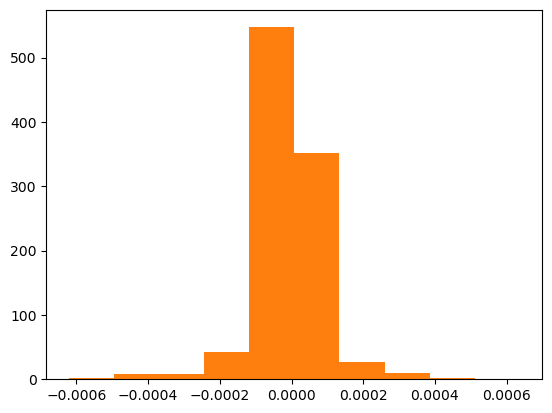

In [26]:
plt.hist(o1.grad.flatten(), label='mine')
plt.hist(o2.grad.numpy().flatten(), label='pytorch')
plt.show()

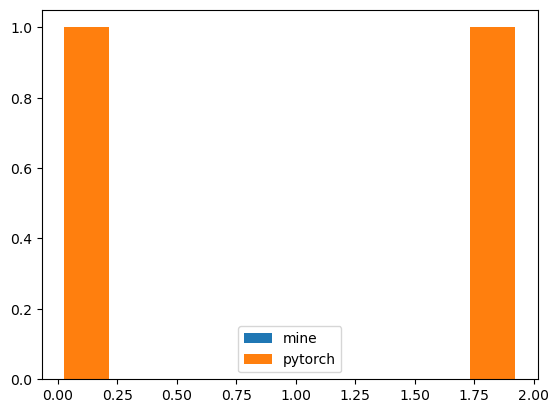

In [27]:
plt.hist(lin1.weight.data.flatten(), label='mine')
plt.hist(lin2.weight.detach().numpy().flatten(), label='pytorch')
plt.legend()
plt.show()

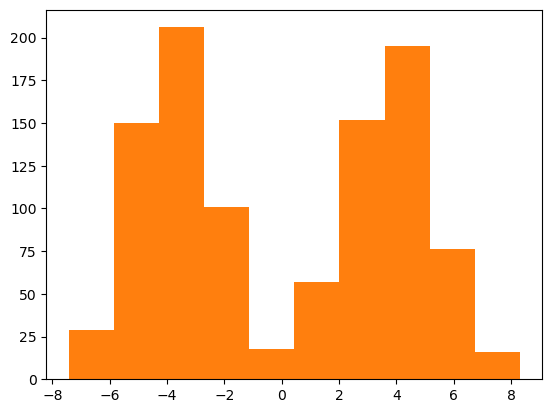

In [28]:
plt.hist(o1.data.flatten(), label='mine')
plt.hist(o2.detach().numpy().flatten(), label='pytorch')
plt.show()